In [129]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Columns or Features Description


PassengerId: A unique identifier assigned to each passenger.

Survived: Indicates whether a passenger survived (1) or died (0).

Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).

Name: The name of the passenger.

Sex: Represents the gender of the passenger, typically categorized as male or female.

Age: The age of the passenger, often represented as a numerical value.

SibSp: Indicates the number of siblings or spouses traveling with the passenger.

Parch: Represents the number of parents or children traveling with the passenger.

Ticket: The ticket number associated with the passenger's ticket.

Fare: The amount of money spent on the ticket.

Cabin: Represents the cabin category or number assigned to the passenger, if available.

Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

In [130]:
# loading the dataset
data = pd.read_csv('Titanic-Dataset.csv')

In [131]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [134]:
# descriptive data analysis
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [139]:
data.duplicated().sum()

0

In [140]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [141]:
data.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [142]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [193]:
# Visualization
count_surv = data['Survived'].value_counts()
count_surv

Survived
0    549
1    342
Name: count, dtype: int64

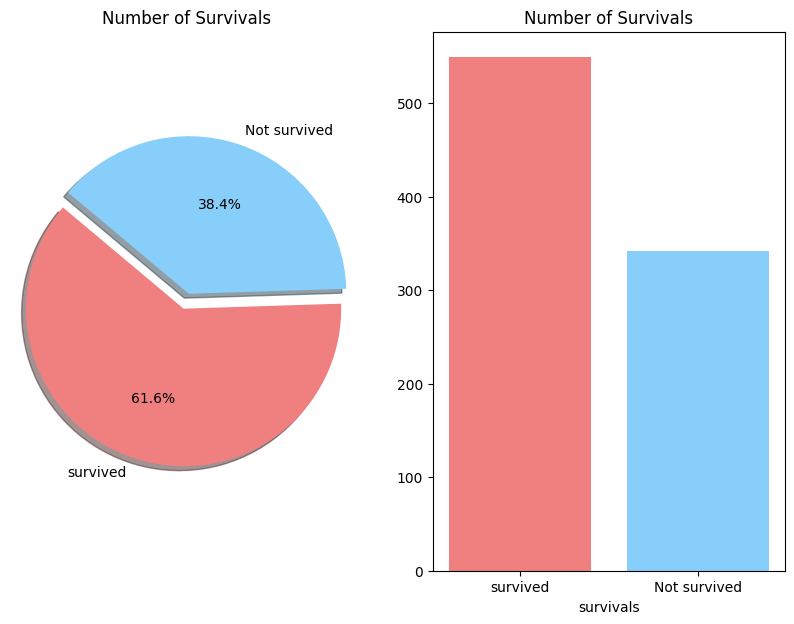

In [144]:


labels = ['survived', 'Not survived']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 
sizes = count_surv

# data for bar chart
bar_labels = ['survived', 'Not survived']
bar_colors = ['lightcoral', 'lightskyblue']
bar_sizes = count_surv

#subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))# sharex = true has x value on plot 2 only 

#plot the piechart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow= True, startangle=140, explode=explode)
ax1.set_title('Number of Survivals')
ax1.axis('equal')

#barchart
ax2.bar(bar_labels, bar_sizes, color=bar_colors)
ax2.set_title('Number of Survivals')
ax2.set_xlabel('survivals')

# display
plt.show()

In [145]:
# count of passengers
count_pclass = data['Pclass'].value_counts()
count_pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

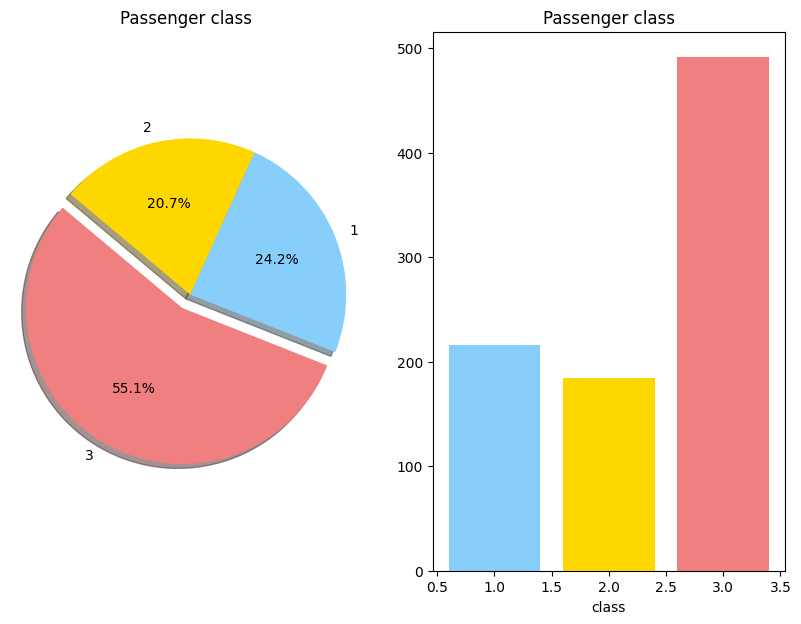

In [146]:
labels = count_pclass.index
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0) 
sizes = count_pclass

# data for bar chart
bar_labels = count_pclass.index
bar_colors = ['lightcoral', 'lightskyblue', 'gold']
bar_sizes = count_pclass

#subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))
#width = plt.xticks(np.arange(1, len(data) + 1))


#plot the piechart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow= True, startangle=140, explode=explode)
ax1.set_title('Passenger class')
ax1.axis('equal')

#barchart
ax2.bar(bar_labels, bar_sizes, color=bar_colors)
ax2.set_title('Passenger class')
ax2.set_xlabel('class')

# display
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

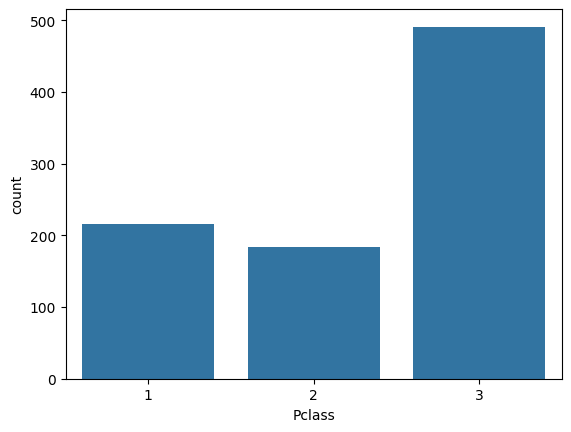

In [147]:
sns.countplot(data, x = 'Pclass')

In [148]:
# count of passengers
count_sex = data['Sex'].value_counts()
count_sex

Sex
male      577
female    314
Name: count, dtype: int64

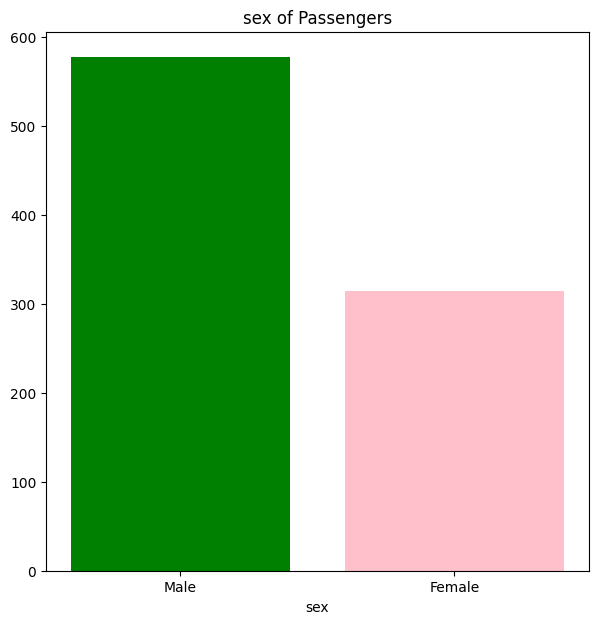

In [149]:
#subplot
f, (ax1) = plt.subplots(1, figsize = (7, 7))

labels = ['Male', 'Female']
colors = ['Green', 'pink'] 
sizes = count_sex

# data for bar chart
bar_labels = ['Male', 'Female']
bar_colors = ['Green', 'pink']
bar_sizes = count_sex


#barchart
ax1.bar(bar_labels, bar_sizes, color=bar_colors)
ax1.set_title('sex of Passengers')
ax1.set_xlabel('sex')

# display
plt.show()

In [150]:
count_sex=data['Age'].value_counts().head()
count_sex

Age
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: count, dtype: int64

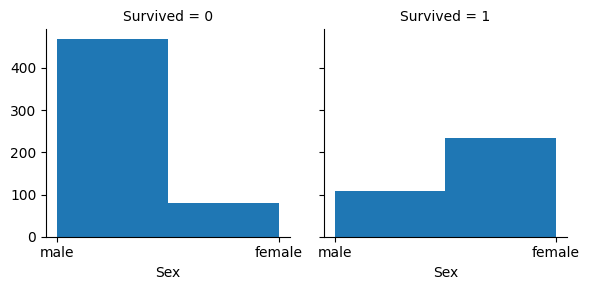

In [151]:
sex=sns.FacetGrid(data,col='Survived')
sex.map(plt.hist,'Sex',bins=2)

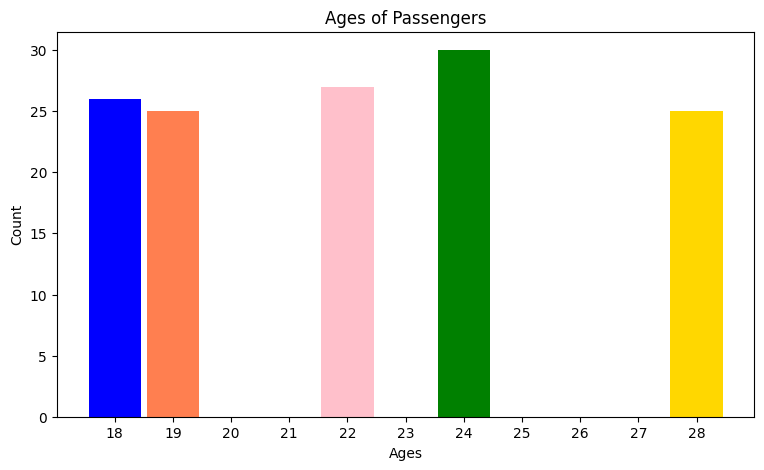

In [152]:
#subplot
f, (ax1) = plt.subplots(1, figsize = (9,5))

labels = count_sex
colors = ['Green', 'pink', 'blue', 'coral', 'gold'] 
sizes = count_sex.index
plt.xticks(np.arange(1, len(data) + 1))

# data for bar chart
bar_labels = count_sex.index
bar_colors = ['Green', 'pink', 'blue', 'coral', 'gold']
bar_sizes = count_sex
width = 0.9


#barchart
ax1.bar(bar_labels, bar_sizes, color=bar_colors, width=width)
ax1.set_title('Ages of Passengers')
ax1.set_xlabel('Ages')
ax1.set_ylabel('Count')

# display
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1196\3343151649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_sex.index, y=count_sex, palette='plasma')


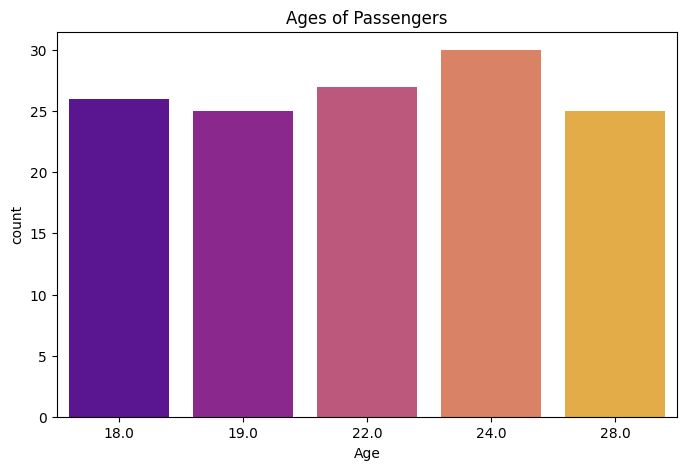

In [153]:
count_sex = data['Age'].value_counts().head()
count_sex

plt.figure(figsize=(8,5))
sns.barplot(x=count_sex.index, y=count_sex, palette='plasma')
plt.title('Ages of Passengers')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

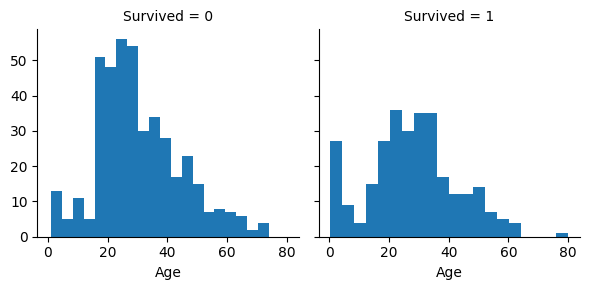

In [154]:
age=sns.FacetGrid(data,col='Survived')
age.map(plt.hist,'Age',bins=20)

C:\Users\USER\AppData\Local\Temp\ipykernel_1196\1863276383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_sib.index, y=count_sib, palette='plasma')


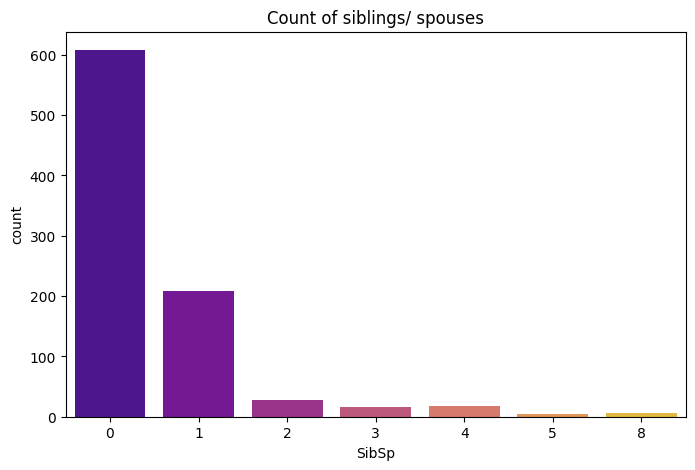

In [155]:
count_sib = data['SibSp'].value_counts()
count_sib

plt.figure(figsize=(8,5))
sns.barplot(x=count_sib.index, y=count_sib, palette='plasma')
plt.title('Count of siblings/ spouses')
plt.xlabel('SibSp')
plt.ylabel('count')
plt.show()

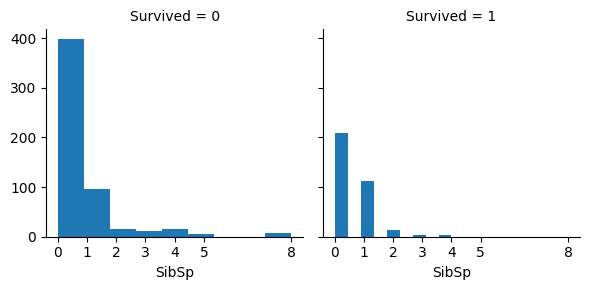

In [156]:
sib=sns.FacetGrid(data,col='Survived')
plt.xticks(count_sib.index)
sib.map(plt.hist,'SibSp',bins=9)

In [157]:
# number of parents/children
count_parch = data['Parch'].value_counts()
count_parch

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

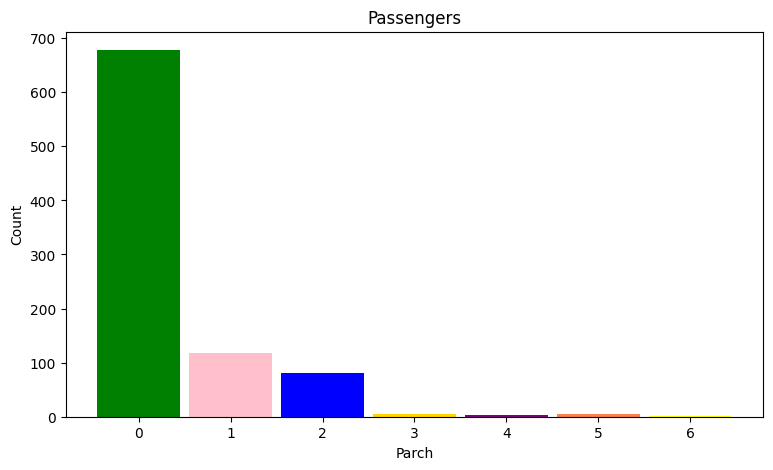

In [158]:
f, (ax1) = plt.subplots(1, figsize = (9,5))

labels = count_parch
color = ['Green', 'pink', 'blue', 'coral', 'gold', 'purple', 'yellow']
sizes = count_parch.index
#plt.xticks(np.arange(1, len(data) + 1))

# data for bar chart
bar_labels = count_parch.index
bar_colors = ['Green', 'pink', 'blue', 'coral', 'gold', 'purple', 'yellow']
bar_sizes = count_parch
width = 0.9


#barchart
ax1.bar(bar_labels, bar_sizes, color=bar_colors, width=width)
ax1.set_title('Passengers')
ax1.set_xlabel('Parch')
ax1.set_ylabel('Count')

# display
plt.show()

In [159]:
# amount spent on ticket
count_fare = data['Fare'].value_counts().head(7)
count_fare

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_1196\3823338408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_fare.index, y=count_fare, palette='plasma')


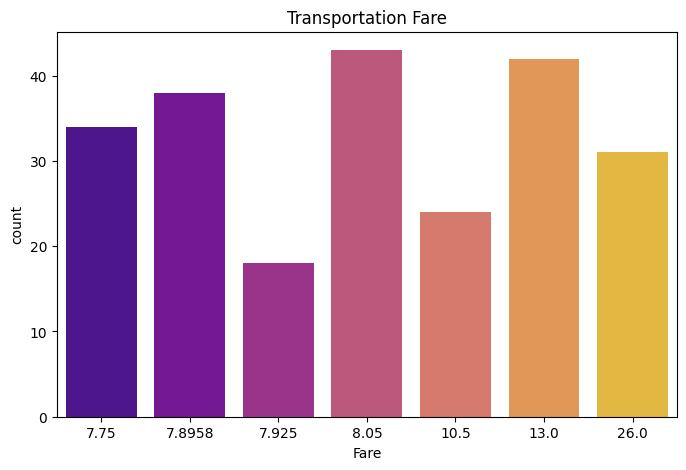

In [160]:

plt.figure(figsize=(8,5))
sns.barplot(x=count_fare.index, y=count_fare, palette='plasma')
plt.title('Transportation Fare')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

In [161]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [162]:
count_emb = data['Embarked'].value_counts()
count_emb

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

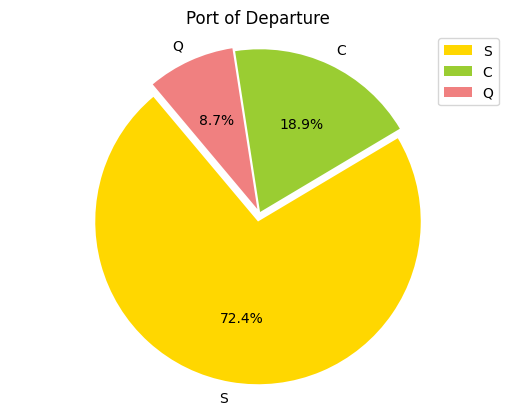

In [163]:
labels = count_emb.index
sizes = count_emb
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.05, 0.01, 0.03)

# ploting the pie chart
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=130)

#adding a title
plt.title('Port of Departure')

# egual aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.legend(labels)

# display the pie chart
plt.show()

In [164]:
# filling missing values
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [165]:
# median
data['Age'].median()

28.0

In [166]:
# filling missing data with median
data['Age'].fillna(data['Age'].median(), inplace=True)

print(data['Age'].value_counts)
data.isna().sum()

<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>


C:\Users\USER\AppData\Local\Temp\ipykernel_1196\2680626950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [167]:
# filling categorical variables with mode
data['Embarked'].mode()[0]

'S'

In [168]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isna().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_1196\2121382460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [169]:
data['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [170]:
# Label encoding
data['Sex'] = data['Sex'].replace({'male': 1, 'female': 0})
data

C:\Users\USER\AppData\Local\Temp\ipykernel_1196\581347006.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'male': 1, 'female': 0})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [171]:
# Label encoding

data['Embarked'] = data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
data

C:\Users\USER\AppData\Local\Temp\ipykernel_1196\2826340714.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,28.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


In [172]:
# correlation matrix of the dataset
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


Axes(0.125,0.11;0.62x0.77)


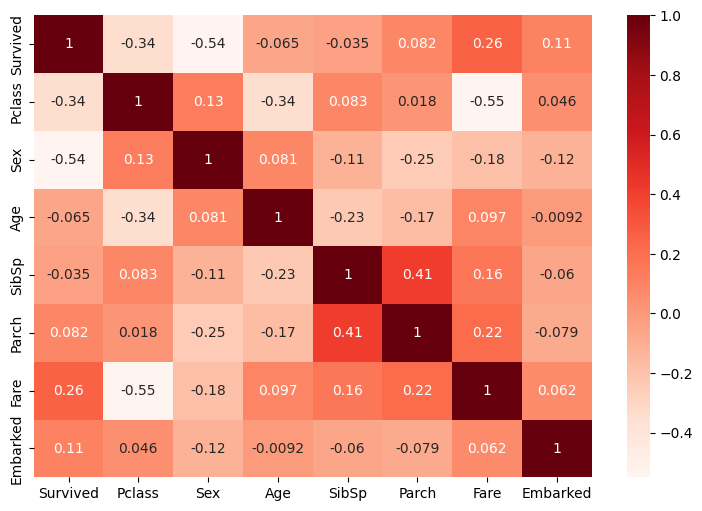

In [173]:
# correlation heatmap of the dataset
plt.figure(figsize = (9,6))
data_corr = data.corr()
heat_map = sns.heatmap(data_corr, annot = True, cmap = 'Reds')
print(heat_map)

In [174]:
# modelling

X = data.drop('Survived', axis = 1)
y = data['Survived']

In [175]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:
# feature scaling 

# Initializng the scaler
scaler = StandardScaler()

# Fitting and transforming  training data
# transforming test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1) Logistic Regression

In [177]:
#Define and train the logistic regression model

# Initialize the model
model = LogisticRegression()  

# Train the model
model.fit(X_train_scaled, y_train)  

LogisticRegression()

In [178]:
# evaluating the model
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



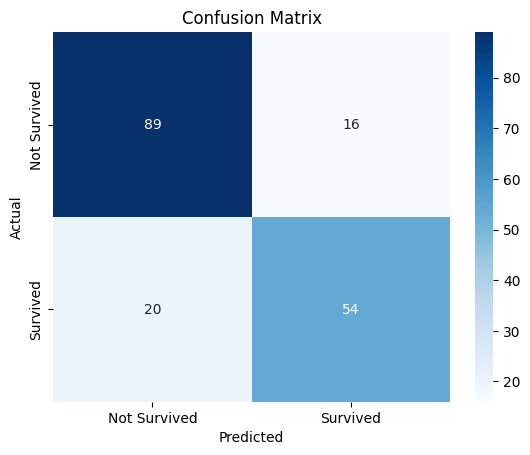

In [179]:
# confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the above matrix, 89 passengers were correctly predicted to not have survived and 54 passengers were correctly predicted to have survived.

2) Random Forest Classifier

In [180]:
# import library
from sklearn.ensemble import RandomForestClassifier


In [181]:
# training the model
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [194]:
# making predictions
RF_y_pred = RF_model.predict(X_test)


accuracy2 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy_score(y_test, RF_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, RF_y_pred))
print("Classification Report:\n", classification_report(y_test, RF_y_pred))

Random Forest Accuracy: 0.8212290502793296
Confusion Matrix:
 [[91 14]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



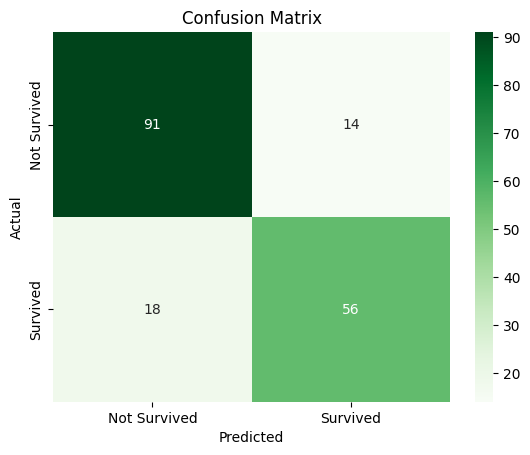

In [207]:
# confusion matrix

sns.heatmap(confusion_matrix(y_test, RF_y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

90 passengers were correctly predicted to not have survived, and 57 passengers were correctly predicted to have survived.

3) K Nearest Neighbours

In [195]:
# import model libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [185]:
# training the model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [186]:
#  making predictions

y_pred_knn = model_knn.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy For KNN:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy For KNN: 0.7150837988826816
Confusion Matrix:
 [[89 16]
 [35 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.53      0.60        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



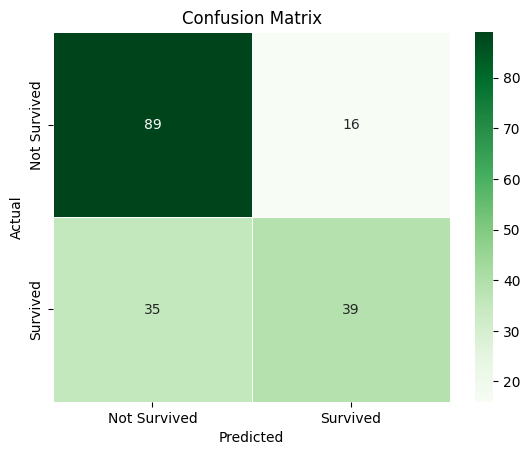

In [210]:
# confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'], linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

89 passengers were correctly predicted to not have survived, and 35 passengers were correctly predicted to have survived

4) Support Vector Machine

In [212]:
# import the library

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [213]:
#Training the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [214]:
# model predictions
svm_y_pred = svm_model.predict(X_test)

accuracy4 = accuracy_score(y_test, svm_y_pred)
print("Accuracy For SVM:", accuracy_score(y_test, svm_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

Accuracy For SVM: 0.6536312849162011
Confusion Matrix:
 [[99  6]
 [56 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



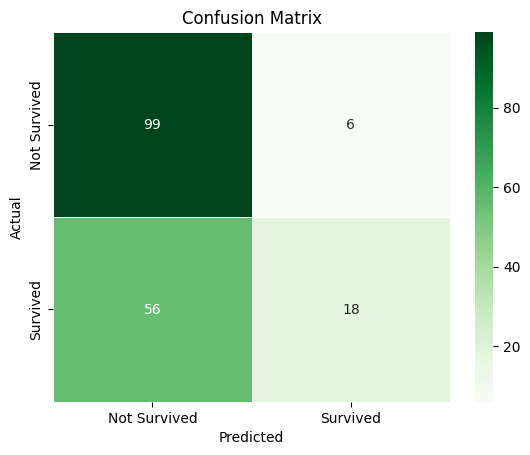

In [216]:
# confusion matrix

sns.heatmap(confusion_matrix(y_test, svm_y_pred), annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'], linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
99 passengers were correctly predicted to not have survived, and 18 passengers were correctly predicted to have survived

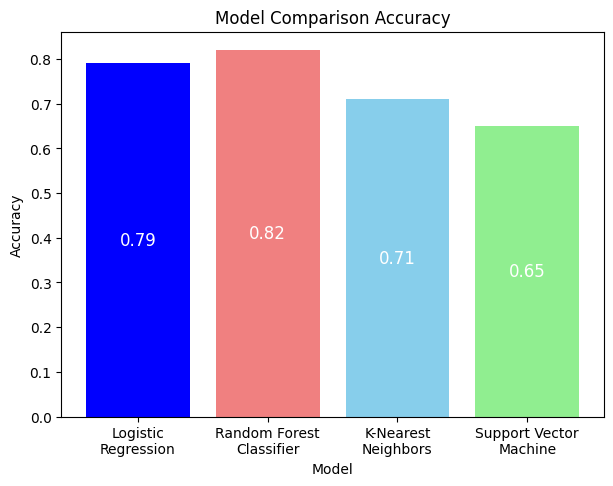

In [218]:
# Accuracy score for corresponding model
accuracy1 = 0.79  # Logistic Regression Accuracy
accuracy2 = 0.82  # Random Forest Classifier Accuracy
accuracy3 = 0.71  # K-Nearest Neighbors Accuracy
accuracy4 = 0.65  # Support Vector Machine Accuracy


model_names = ["Logistic\nRegression", "Random Forest\nClassifier", "K-Nearest\nNeighbors", "Support Vector\nMachine"]


model_scores = [accuracy1, accuracy2, accuracy3, accuracy4]

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(model_names, model_scores, color=['blue', 'lightcoral', 'skyblue', 'lightgreen'])  # Different colors for each model

# labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison Accuracy')

# Display the accuracy values in the middle of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    
    # Position the text in the middle of the bar 
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=12, color='white')


plt.show()


Random Forest Classifier has the highest accuracy (0.82) as compared to the accuracy of the other models.

Report

The Titanic dataset is a dataset used for classification tasks.


The goal of this task is to predict whether a passenger survived or not based on various features such as age, gender, class, sex, and other details


The dataset was cleaned, preprocessed, data splitting and feature scaling was done.


Four machine learning classification algorithms were used for the task:


Logistic Regression

K-Nearest Neighbors(KNN)

Random Forest Classifier

Support Vector Machine(SVM)


Each model was trained using training and evaluated using test set.


Each model performed well with the Random Forest Classifier model performing better than the rest models with overall Accuracy of 82.12%. 


The model still maintained a strong overall performance with a high f1-score and recall for all models. 


The Random Forest Classifier model was best suited for the dataset and gave the best accuracy, therefore it is recommended.
